# Assignment 1: Python Warmup and Image Manipulation

---
Please edit the cell below to include your name and student ID #

**name:** Paul Tran

**SID:** 57931045

# 0. Jupyter Notebook Tutorials 

We will make extensive use of Python's numerical arrays (NumPy) and interactive plotting (Matplotlib) in Jupyter notebooks for the course assignments. This first assignment is intended as a gentle warm up in case you haven't used these tools before. Start by reading through the following tutorials:

If you haven't used Jupyter before, a good place to start is with the introductory documentation here:

http://opentechschool.github.io/python-data-intro/core/notebook.html

https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#starting-the-notebook-server

https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb

https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb


This page gives a good introduction to NumPy and many examples of using NumPy along with Matplotlib:

http://scipy-lectures.org/intro/numpy/array_object.html

https://numpy.org/doc/stable/user/absolute_beginners.html

You should also get comfortable with searching through the documentation as needed

https://numpy.org/doc/stable/reference/index.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html


---
The cell below sets up our environment for interactive plotting and imports some modules we will use for this assignment. You should not need to import any other modules to complete the assignment

In [1]:
%matplotlib notebook

#standard modules numpy and matplotlib we will use frequently
import numpy as np
import matplotlib.pyplot as plt

#interpolation function for part 2
from scipy.interpolate import griddata

#import the provided code selectpoints.py
from selectpoints import select_k_points


***
# 1. 2D Rotation [20pts]

Write a function ***rotate_points*** which takes a set of 2D points (stored in
a ***numpy*** array) and an angle (in degrees) and returns a new set of 
point coordinates which have been rotated *counter-clockwise* by the 
specified angle.

By counter-clockwise, we mean counter-clockwise in a coordinate system
where the first coordinate axis is to the right and the second axis is up.
(NOTE: when displaying images we typically use a coordinate system where
 the y-axis is increasing downwards).

You should first build the appropriate 2x2 rotation matrix based on the input angle
and then apply this transformation to all of the vectors representing each point.
In NumPy the "*" operator performs element-wise multiplication.  For matrix-vector
multiplication you need to use the "@" operator.
                                                                 
To get full credit, you need to complete the two cells below.  The first
should contain your implementation of ***rotate_points***. The second 
should contain some test code which demonstrates your rotation function
by generating a set of points, plotting them, using your rotate function
to rotate them and plotting the rotated points.                                                                 

In [2]:
def rotate_points(points,angle):
    """
    Rotate the input grayscale image by a specified number of degrees
    
    
    Parameters
    ----------
    points : 2D numpy.array (dtype=float)
        Coordinates of N points stored in a array of shape (2,N)

    angle : float
        The angle by which to rotate the image in degrees

    Returns
    -------
    points_rotated : 2D numpy.array (dtype=float)
        array containing coordinates of the rotated points
        
    """
    
    #your code goes here
    #convert angle to radians
    angle = np.radians(angle)
    R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    points_rotated = R @ points
    
    #check that the dimensions are correct/match up
    assert(points.shape[0]==2)
    assert(points_rotated.shape[0]==2)
    assert(points.shape[1]==points_rotated.shape[1])
    
    return points_rotated

<IPython.core.display.Javascript object>


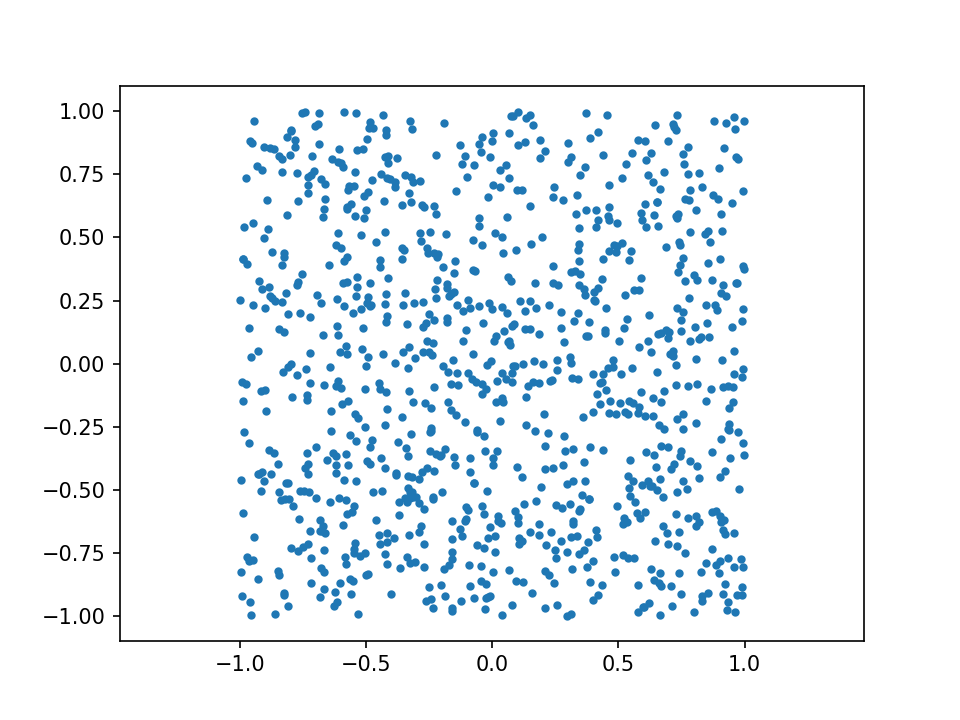

<IPython.core.display.Javascript object>


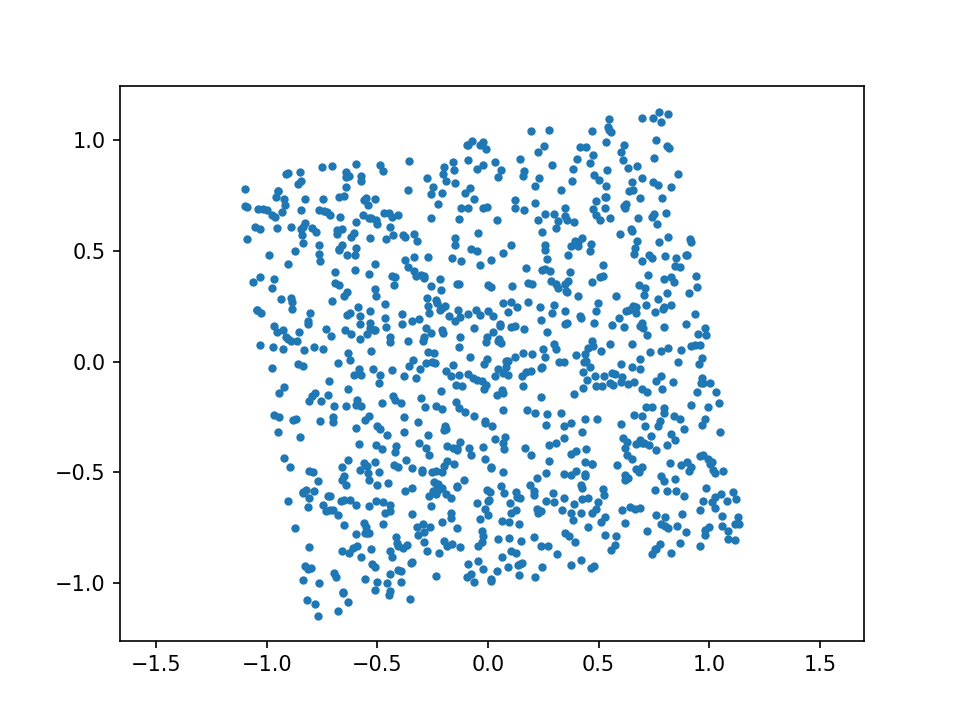

In [21]:
#
# Your test code goes here
#

# generate 1000 points and random in the square [-1,1]x[-1,1]
# using np.random.uniform
points = np.random.uniform(-1,1,(2,1000))

# plot the points
plt.figure()
plt.plot(points[0,:],points[1,:],'.')

# make sure that the plot has equal scaling on the x and y axis
# so that the square appears square
plt.axis('equal')

# rotate the points by 10 degrees
points_rotated = rotate_points(points,10)

# plot the rotated points
plt.figure()
plt.plot(points_rotated[0,:],points_rotated[1,:],'.')
plt.axis('equal')

plt.show()

# 2. Image Rotation [55pts]

Write a function ***rotate_image*** that takes a grayscale image and an angle (in degrees)
and returns a new image which has been rotated clockwise around the center of the
image by the specified angle.

To accomplish this your code should carry out the following steps:

1. ***Generate the x,y coordinates of the pixels in the image relative to the center of the image.*** For example, if the image is 101 pixels wide, the x coordinate should range from -50 to 50. You may find the function **np.meshgrid** useful for generating the pixel coordinates.  (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) 
For example: **gridx,gridy = np.meshgrid(np.arange(-2,3),np.arange(-1.5,2.5))** generates pixel coordinates for an image that is 4 pixels tall and 5 pixels wide.  Make sure your code is correct for both odd and even width/height images.


2. ***Store the coordinates in a 2xN array and use your rotate_pts function to rotate them***
If you use **np.meshgrid** to generate coordinates, you find that the results are stored in
two separate 2D arrays.  In order to apply your previously written function you will need to 
reshape them into a 1xN array (where N is the total number of pixels in the image) and stack
the two results together to get a 2xN array. You will find the functions **np.reshape** and **np.concatenate** 
useful in this regard. You should also reshape the image brightness values into a 1xN array.


3. ***Determine the dimensions of the rotated image***.  Now that you have the coordinates of
the rotated pixel centers, you can compute the minimum and maximum coordinates in order to 
determine the range of coordinates for the output image (xmin,xmax)  (ymin,ymax)


4. ***Generate coordinates of the pixels in the rotated image*** You can again do this using **meshgrid**. Again you need to make sure that your point coordinates are centered even around the origin.


5. ***Interpolate brightness values at the new pixel coordinate locations*** In order to 
interpolate the brightness values from the old grid to the new grid, we will use the function **scipy.interpolate.griddata**.  Start by reading the documentation for **griddata**. Pay 
attention to what shape the inputs are (you may need to transpose some of your arrays).
You need to provide **griddata** with three pieces of information: the coordinates of the pixels 
after we have rotated them, the gray value for each of those pixels, and the grid of pixel 
coordinates for the output image.  By default, **griddata** will set the value of any pixels 
that are outside the source image to NaN. 


In [6]:
def rotate_image(image,angle):
    """
    Rotate the input grayscale image by a specified number of degrees
    
    
    Parameters
    ----------
    image : 2D numpy.array (dtype=float)
        Pixel brightness values stored in an array of shape (H,W)

    angle : float
        The angle by which to rotate the image in degrees

    Returns
    -------
    image_rotated : 2D numpy.array (dtype=float)
        2D array containing the rotated image
        
    """

    h,w = image.shape
    n = h*w

    # generate pixel coordinates for the input image
    if (h%2==0):
        y2 = h/2 + .5
        y1 = -(h-y2)
    else:
        y2 = (h+1)/2
        y1 = -(h-y2)

    if w%2==0:
        x2 = w/2 + .5
        x1 = -(w-x2)
    else:
        x2 = (w+1)/2
        x1 = -(w-x2)

    (gridx,gridy) = np.meshgrid(np.arange(x1,x2),np.arange(y1,y2))

    # reshape the grid of x and y coordinates into an 2xN array
    pts = np.concatenate((gridx.reshape(1,n),gridy.reshape(1,n)))

    # compute their locations after rotating
    rot_pts = rotate_points(pts,-angle)
    
    # find the extent of the rotated pixels
    minx = min(rot_pts[0,:])
    maxx = max(rot_pts[0,:])
    miny = min(rot_pts[1,:])
    maxy = max(rot_pts[1,:])

    # check that limits are centered around 0
    #  if this assert fails it means your grid generation isn't centered
    #  (or possibly that your rotation code is incorrect)
    assert((minx+maxx)<0.01)
    assert((miny+maxy)<0.01)

    # generate a grid covering the output range
    (ogridx,ogridy) = np.meshgrid(np.arange(minx,maxx),np.arange(miny,maxy))
    
    # collect the brightness values of the pixels in an Nx1 vector
    bvalues = image.reshape(n,1)
  
    # use griddata to interpolate the gray values of the input pixels 
    # on to the new output grid

    image_rotated = griddata(rot_pts.T ,bvalues, (ogridx,ogridy))

    #print(image_rotated.shape)
    print("image shape",image_rotated.shape)
    # return the resulting image
    return image_rotated


# 3. Test your image rotation [5pts]

Use **matplotlib.pyplot.imread** to load in a grayscale image of your choice. If you don't have a grayscale image handy, load in a color image and then convert it to grayscale averaging together the three color channels (use **numpy.mean**).

You can display your image in the notebook using the **matplotlib.pyplot.imshow** function. Display your input image and then call your **rotate_image** function in order to rotate your image by 45 degrees.  Then display the resulting rotated image.

**HINT:** When loading an image with **imread** it is important to example the data type of the returned array. Depending on the image it may be that `I.dtype = uint8` or `I.dtype = float32`. Integer values range in [0..255] while floating point values for an image will be in [0..1].  A simple approach is to always convert images to floats, this will avoid much confusion and potential bugs later on.


In [7]:
# first test to make sure that multiples of 90 degree 
# rotations give the right sized outputs

def testrot(I):
    J0 = rotate_image(I,0)
    J1 = rotate_image(I,90)
    J2 = rotate_image(I,180)

    print("I.shape=",I.shape)
    print("J0.shape=",J0.shape)
    print("J1.shape=",J1.shape)
    print("J2.shape=",J2.shape)

    assert(J0.shape == I.shape)
    assert(J1.shape[0]==I.shape[1])
    assert(J1.shape[1]==I.shape[0])
    assert(J2.shape==I.shape)
    
# create some synthetic test cases here by just creating an array I
# with random values in it and see that it passes the test above
I =  np.random.uniform(-1,1,(2,3))
# make sure to test for both even and odd sized images
testrot(I)


image shape (1, 2, 1)
image shape (2, 2, 1)
image shape (2, 2, 1)
I.shape= (2, 3)
J0.shape= (1, 2, 1)
J1.shape= (2, 2, 1)
J2.shape= (2, 2, 1)


AssertionError: 

I.shape= (261, 333, 3) 
I.dtype= uint8


<IPython.core.display.Javascript object>


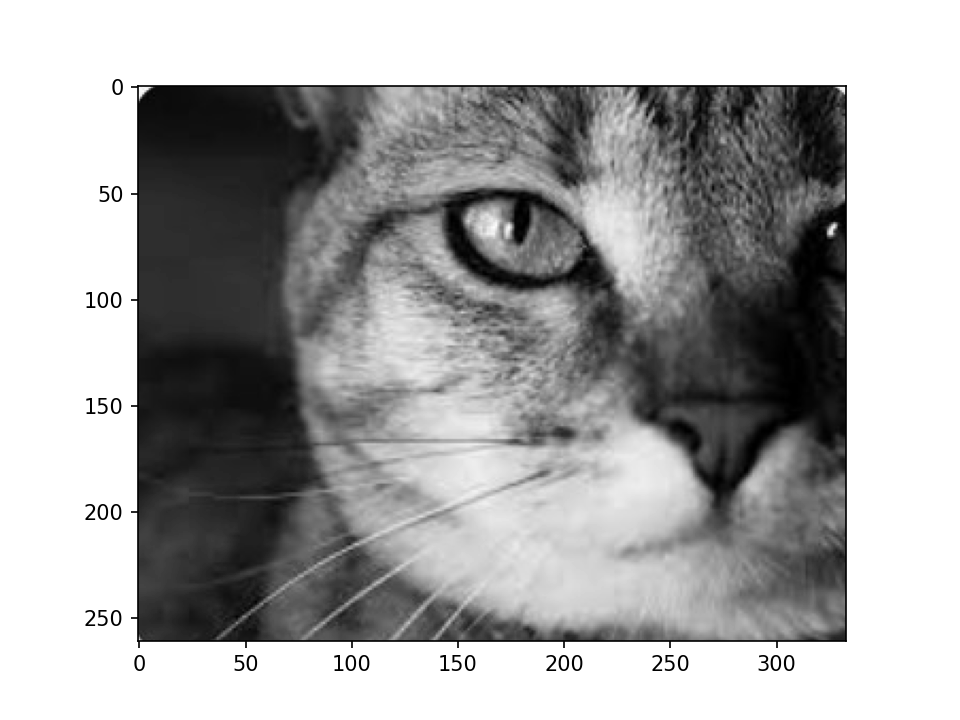

In [17]:

#load an image
I = plt.imread('cat_img.jpg')

#display the shape of the array and data type
print("I.shape=",I.shape,"\nI.dtype=",I.dtype)

#convert to float data type and scale to [0..1] if necessary
if (I.dtype == np.uint8):
    I = I.astype(float) / 256
    
#I.dtype should now be float

#if your image is color (shape HxWx3), convert to grayscale by averaging together 
# the three color channels (R,G,B).  If your image has an alpha channel (HxWx4)
# you should just drop it.
image = np.mean(I,axis=2)

#display the image in the notebook using a grayscale colormap
plt.figure()
plt.imshow(image,cmap=plt.cm.gray)

#force matplotlib to go ahead and display the plot immediately
plt.show()   

# # #rotate the image 45 degrees
# image_rot = rotate_image(image,45)
# 
# # #display the rotated image
# plt.figure()
# plt.imshow(image_rot,cmap=plt.cm.gray)

image shape (419, 419, 1)


<IPython.core.display.Javascript object>


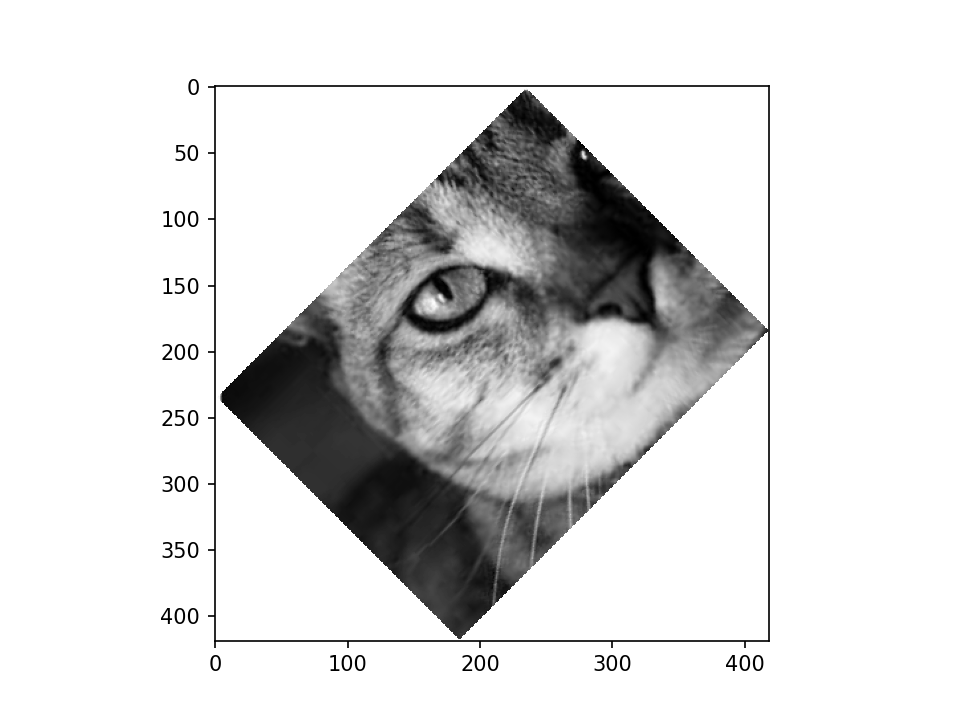

In [14]:
# #rotate the image 45 degrees
image_rot = rotate_image(image,45)

# #display the rotated image
plt.figure()
plt.imshow(image_rot,cmap=plt.cm.gray)

# 4. User Interaction [20pts]

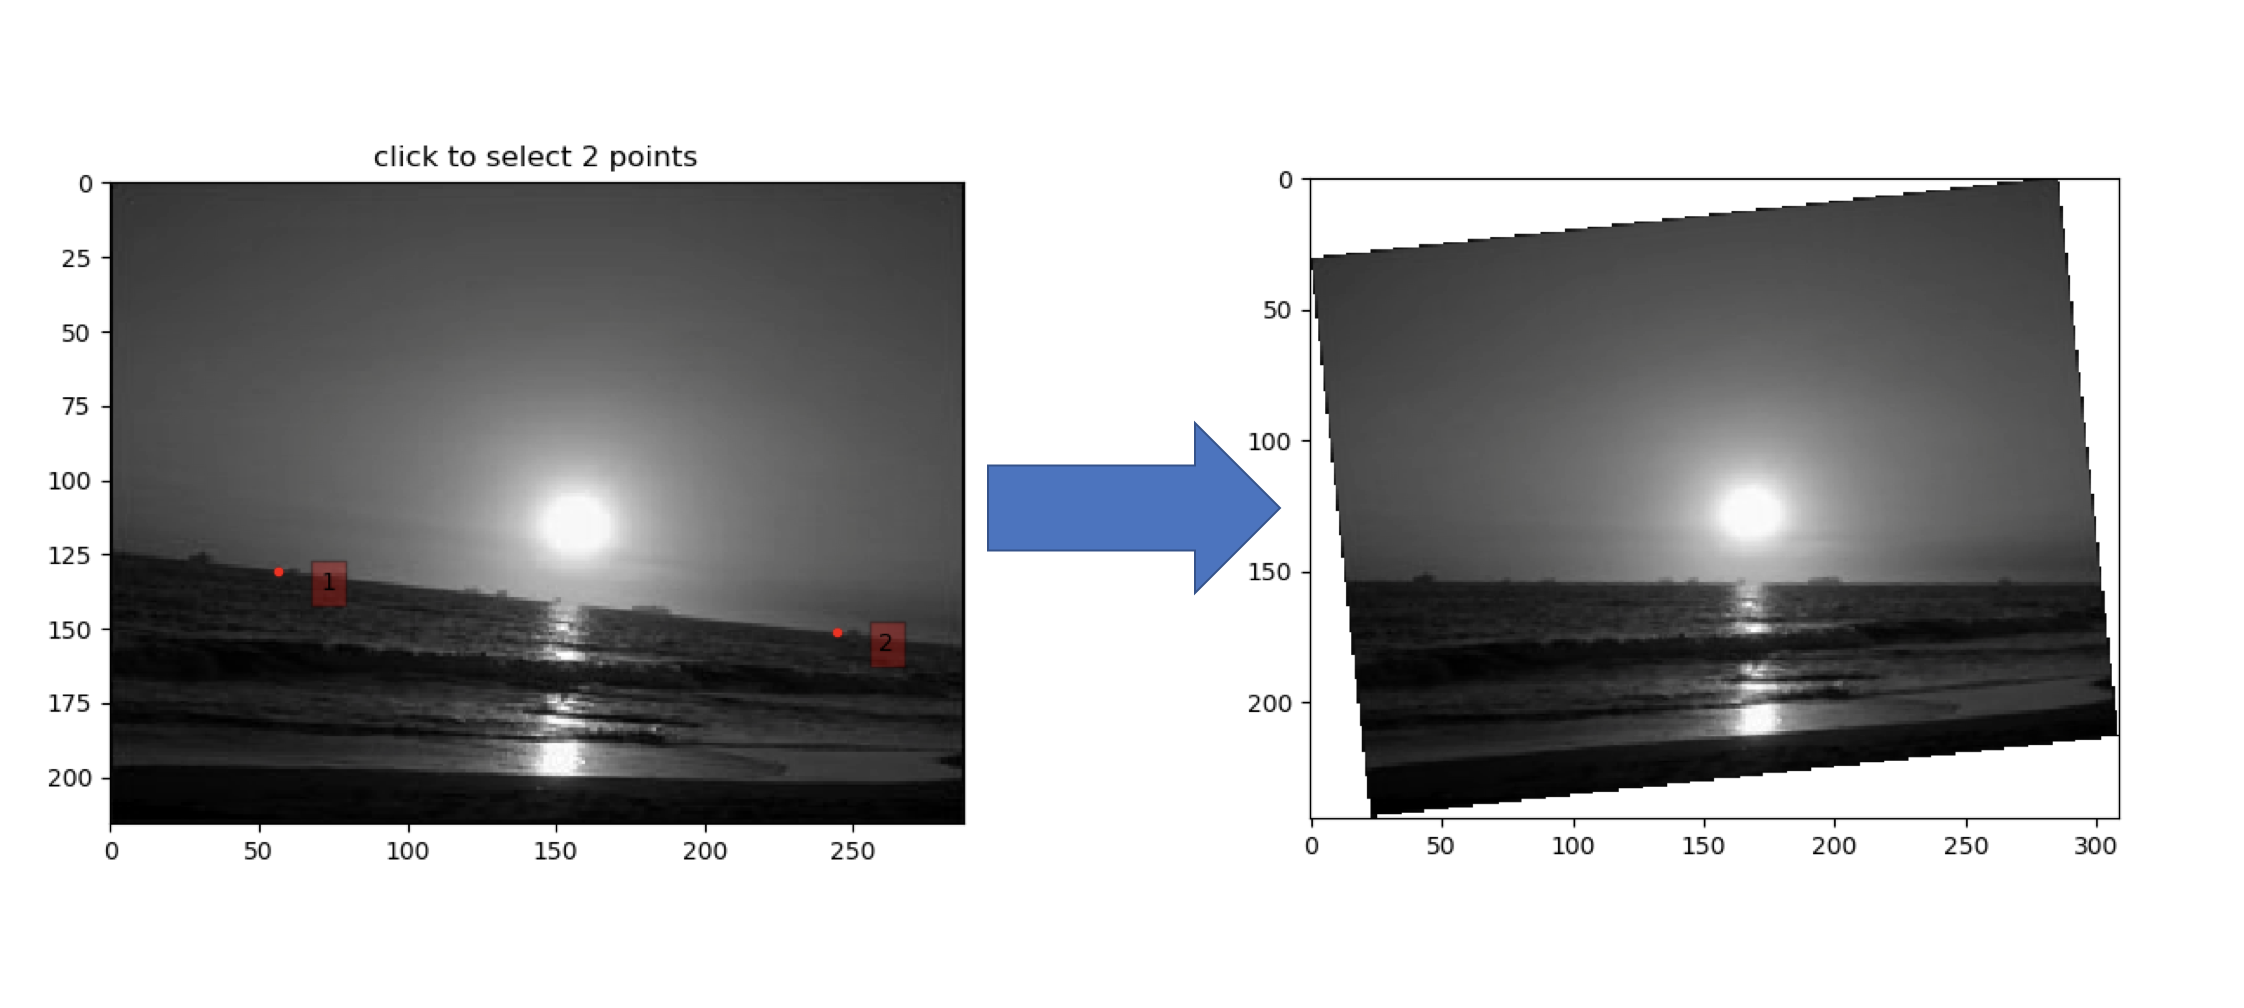

Write code that loads in an image, allows the user to click on two points in the image, and then rotates the image so that the line connecting these two points is horizontal. This script will use your **rotate_image** function as a subroutine to generate the rotated image. 

Load and display the image as in the previous exercise.  In order to get user mouse clicks, you can use the provided function **select_k_points** which allows you to click on **k** points on a specified image axis.
Once you have the two points clicked, you will need to do a little trigonometry to find the angle by which you'll need to rotate the image in order to make those two points lie on a horizontal line.  Rotate the image by that amount and display the result.

In your final submission, please utilize the provided image *crooked_horizon.jpg* and use your code in order to make the horizon horizontal.

NOTE: Your code should allow the user to click two points on the horizon in any order.

<IPython.core.display.Javascript object>


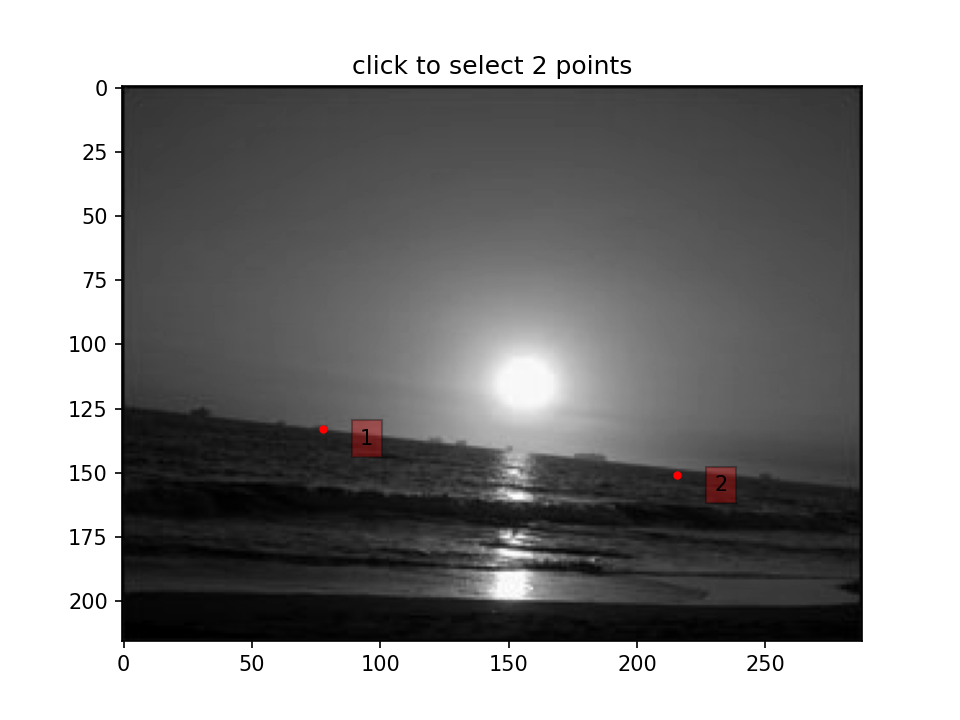

offset= 14.4


In [19]:

#load the crooked_horizon.jpg image and convert to grayscale / floats
...
image = plt.imread('crooked_horizon.jpg')
if (image.dtype == np.uint8):
    image = image.astype(float) / 256
image = np.mean(image,axis=2)

#display the image in the notebook using a grayscale colormap
# here we keep track of the image axis variable ax, which we
# need to pass along to the select_k_points function
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(image,cmap=plt.cm.gray)

#selectpoints will show the axis and wait for the specified 
# number of user clicks.
k = 2
spoints = select_k_points(ax,k)

image shape (251, 313, 1)


<IPython.core.display.Javascript object>


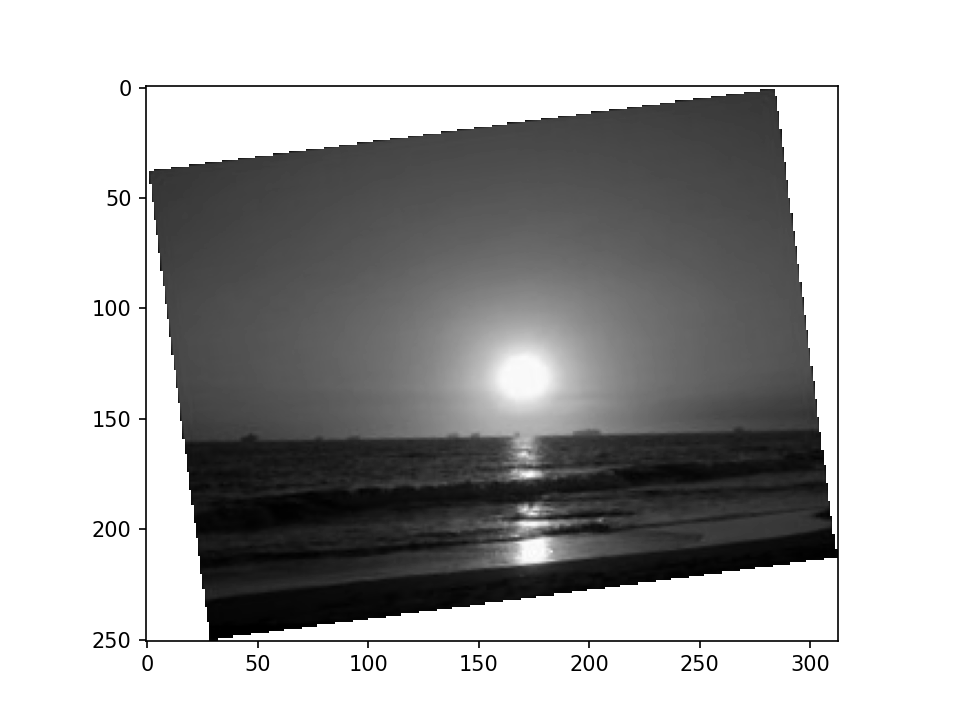

In [20]:
# once you finished clicking, execute this cell

# get the x,y coordinates of the selected points
xp = spoints.xs
yp = spoints.ys

# compute rotation angle
angle = np.arctan2(yp[1]-yp[0],xp[1]-xp[0])*180/np.pi

# rotate the image by the appropriate amount
image_rot = rotate_image(image,angle)

# display the new corrected image

plt.figure()
plt.imshow(image_rot,cmap=plt.cm.gray)

